<a href="https://colab.research.google.com/github/akhila0125-ai/greatlearning/blob/main/ENews_Express_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [17]:
# Installing the libraries with the specified version.
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4 seaborn==0.13.2 scipy==1.14.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [18]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from math import sqrt
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


sns.set(style="whitegrid", palette="muted")


## Reading the Data into a DataFrame

In [19]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


file_path = '/content/drive/MyDrive/abtest.csv'
df = pd.read_csv(file_path)


Mounted at /content/drive


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [20]:
# Data Overview
# Viewing the first and last few rows of the dataset
display(df.head())
display(df.tail())

# Checking the shape of the dataset - (100, 6)
print("Shape of the dataset:", df.shape)

# Getting the statistical summary for the variables
# Numerical summary
print("Statistical summary (numeric variables):")
display(df.describe())

# Categorical summary
print("Statistical summary (categorical variables):")
display(df.describe(include=['object']))

# Check for missing values - There are no missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for duplicates - No duplicates
print("Number of duplicate rows:", df.duplicated().sum())

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


Shape of the dataset: (100, 6)
Statistical summary (numeric variables):


,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


Statistical summary (categorical variables):


,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


Missing values in each column:
user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64
Number of duplicate rows: 0




```
# This is formatted as code
```

### Univariate Analysis

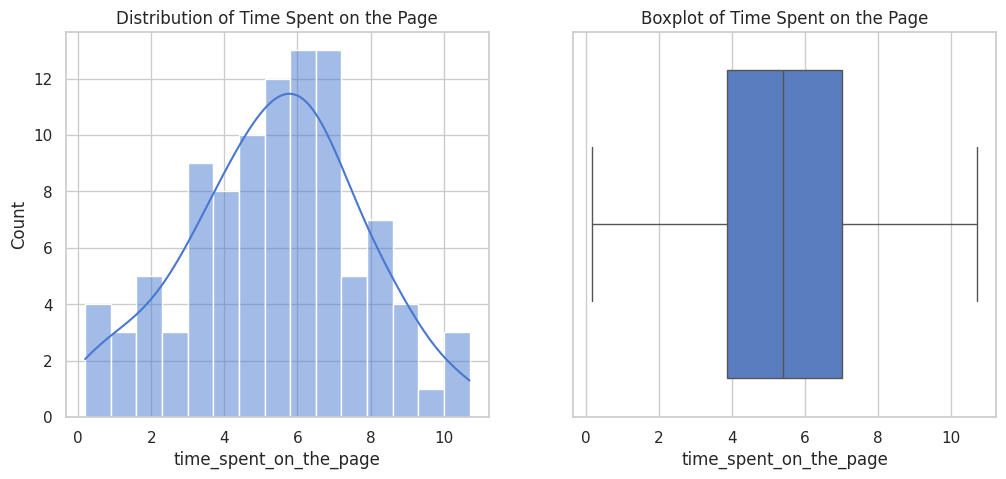

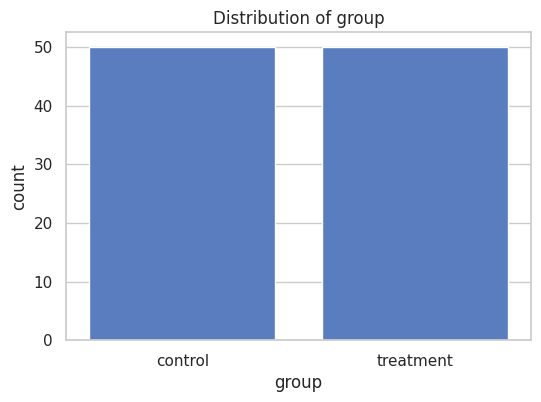

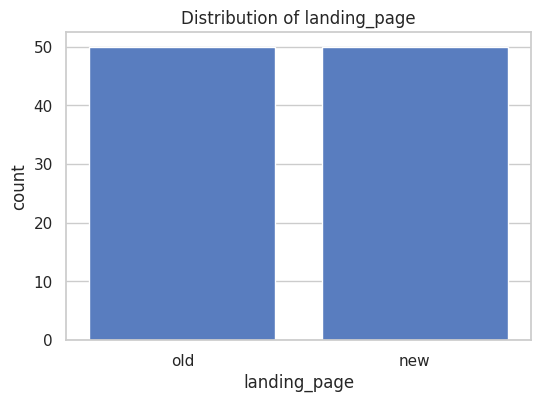

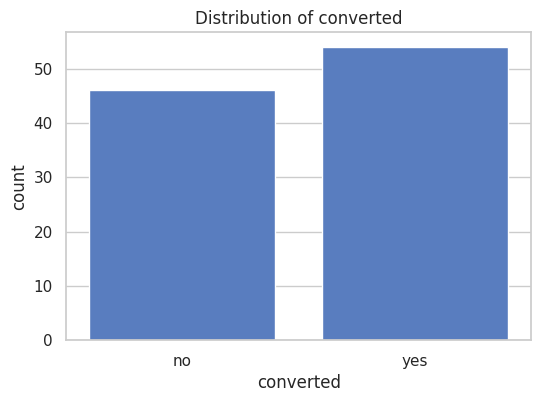

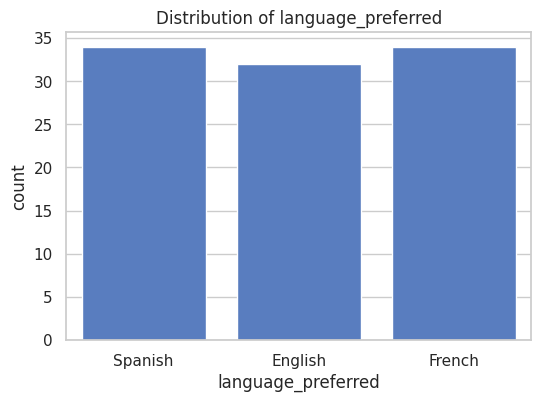


Value counts for group:
group
control      50
treatment    50
Name: count, dtype: int64

Value counts for landing_page:
landing_page
old    50
new    50
Name: count, dtype: int64

Value counts for converted:
converted
yes    54
no     46
Name: count, dtype: int64

Value counts for language_preferred:
language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64


In [21]:
# Numeric variable: time_spent_on_the_page

# Histogram and boxplot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['time_spent_on_the_page'], bins=15, kde=True)
plt.title("Distribution of Time Spent on the Page")

plt.subplot(1,2,2)
sns.boxplot(x=df['time_spent_on_the_page'])
plt.title("Boxplot of Time Spent on the Page")

plt.show()

# Categorical variables: group, landing_page, converted, language_preferred

categorical_cols = ['group','landing_page','converted','language_preferred']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

# Observations
# 1. Time spent varies from 0.19 to 10.7 and more people spending time around 5
# 2. English Language preferenc is little bit smaller than French and Spanish
# 3. There are more people who got converted over the full data set rather than who didnt
# 4. The control and treatment group data is equally distributed

```
# This is formatted as code
```

### Bivariate Analysis

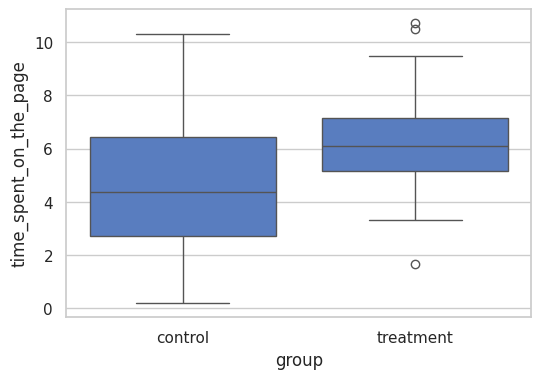

Average time spent by group:
group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64


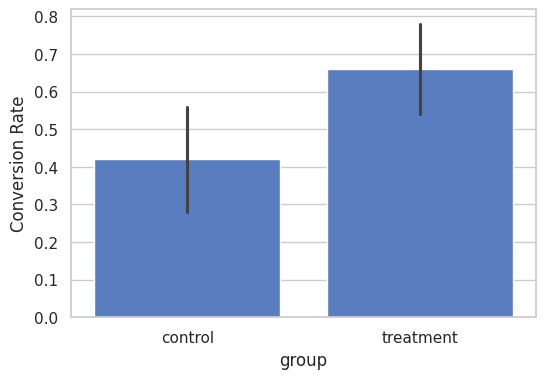


Conversion proportions by group:
converted    no   yes
group                
control    0.58  0.42
treatment  0.34  0.66


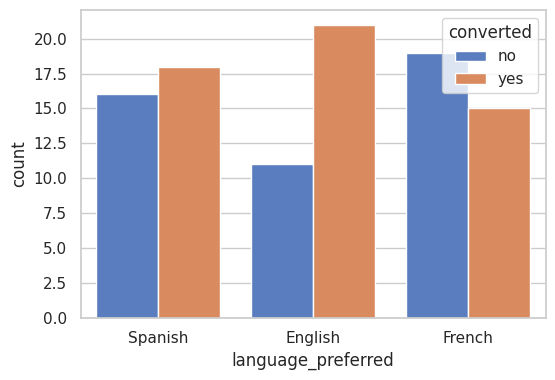


Conversion proportions by language:
converted                 no       yes
language_preferred                    
English             0.343750  0.656250
French              0.558824  0.441176
Spanish             0.470588  0.529412


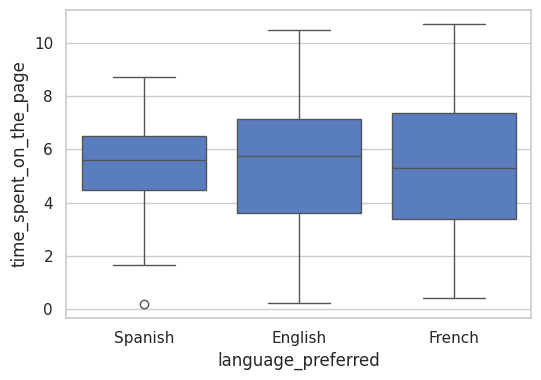


Average time spent by language:
language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


In [22]:
# 1. Time spent on page by group
plt.figure(figsize=(6,4))
sns.boxplot(x="group", y="time_spent_on_the_page", data=df)
plt.show()

print("Average time spent by group:")
print(df.groupby("group")["time_spent_on_the_page"].mean())

# Observation - Treatment group (new landing page) has spent more time than control group

# 2. Conversion rate by group
plt.figure(figsize=(6,4))
sns.barplot(x="group", y=df["converted"].map({"yes":1, "no":0}), data=df)
plt.ylabel("Conversion Rate")
plt.show()

print("\nConversion proportions by group:")
print(df.groupby("group")["converted"].value_counts(normalize=True).unstack())

# Observation - Treatment group has more conversion than the control group

# 3. Conversion status by language
plt.figure(figsize=(6,4))
sns.countplot(x="language_preferred", hue="converted", data=df)
plt.show()

print("\nConversion proportions by language:")
print(pd.crosstab(df['language_preferred'], df['converted'], normalize='index'))

# Observation
# a. People have much higher conversion in english (0.65)
# b. French has very low conversion (0.44)

# 4. Time spent on page by language
plt.figure(figsize=(6,4))
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data=df)
plt.show()

print("\nAverage time spent by language:")
print(df.groupby("language_preferred")["time_spent_on_the_page"].mean())

# Observation - Avg time spent is pretty much the same across all languages

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

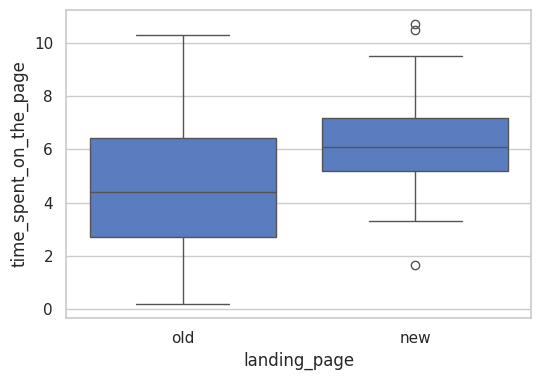

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data=df)
plt.show()

# Observation:
# 1. Looks like time spent on new landing page is higher
# 2. Time spent is lower in old and the times are also having a higher range of times

### Step 1: Define the null and alternate hypotheses

> **Null Hypothesis (H₀):**  
> The mean time spent on the new landing page is **less than or equal to** the mean time spent on the old landing page.  
> $H_{0}: \mu_{new} \leq \mu_{old}$  
>
> **Alternate Hypothesis (H₁):**  
> The mean time spent on the new landing page is **greater than** the mean time spent on the old landing page.  
> $H_{1}: \mu_{new} > \mu_{old}$



### Step 2: Select Appropriate test

> Since we are comparing the **mean time spent** between two independent groups  (old landing page vs. new landing page), the appropriate test is a  **Two Independent Sample t-test**.  
>
>  This is a **one-tailed test** because we are specifically interested in whether the new landing page results in **greater time spent** than the old landing page.  

### Step 3: Decide the significance level

> We will use a **5% significance level (α = 0.05)**.  
>
> This means we are willing to accept a 5% chance of rejecting the null hypothesis when it is actually true. This is the most commonly used threshold because it strikes a balance between being too strict (risking missed effects at α = 0.01) and too lenient  (risking too many false positives at α = 0.10).
>
> In practice:  
> - If the p-value ≤ 0.05 → Reject H₀ (evidence supports the alternative).  
> - If the p-value > 0.05 → Fail to reject H₀ (not enough evidence to support the alternative).  

### Step 4: Collect and prepare data

In [24]:
# Split the dataset into old and new landing page groups
old_page = df[df['landing_page'] == 'old']['time_spent_on_the_page']
new_page = df[df['landing_page'] == 'new']['time_spent_on_the_page']

print("Number of users on old page:", len(old_page))
print("Number of users on new page:", len(new_page))
print("\nAverage time on old page:", round(old_page.mean(), 2))
print("Average time on new page:", round(new_page.mean(), 2))

Number of users on old page: 50
Number of users on new page: 50

Average time on old page: 4.53
Average time on new page: 6.22


### Step 5: Calculate the p-value

In [25]:
from scipy.stats import ttest_ind

# Perform two independent sample t-test
t_stat, p_val_two_tailed = ttest_ind(new_page, old_page)

# Convert to one-tailed p-value
p_val_one_tailed = p_val_two_tailed / 2

print("T-statistic:", t_stat)
print("One-tailed p-value:", p_val_one_tailed)

T-statistic: 3.7867702694199856
One-tailed p-value: 0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [26]:
alpha = 0.05

print("One-tailed p-value:", p_val_one_tailed)
print("Significance level (α):", alpha)

if (t_stat > 0) and (p_val_one_tailed <= alpha):
    print("\nConclusion: Reject H₀ → Users spend significantly MORE time on the new landing page.")
else:
    print("\nConclusion: Fail to reject H₀ → No significant evidence that users spend more time on the new page.")


One-tailed p-value: 0.0001316123528095005
Significance level (α): 0.05

Conclusion: Reject H₀ → Users spend significantly MORE time on the new landing page.


### Step 7:  Draw inference

> At the 5% significance level, the **p-value was much smaller than 0.05**.  
> Therefore, we **reject the null hypothesis**.  
>
> **Final Inference:**  
> Users spend **significantly more time** on the **new landing page** compared to the old landing page.  
>  
> This suggests that the new landing page is effective in keeping users engaged longer.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

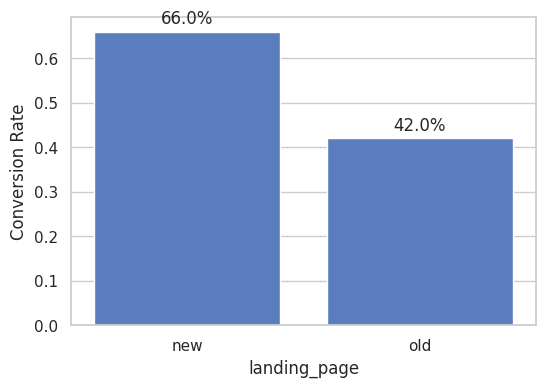


Step 4: Data Summary
Old page:  x_old = 21, n_old = 50, p_old = 0.420
New page:  x_new = 33, n_new = 50, p_new = 0.660

Step 5: Test Statistic and p-value
z-statistic = 2.4077
one-tailed p-value = 0.008026

Step 6: Decision Rule
α = 0.05
Decision: Reject H0


In [27]:
# --- Step 1: Visual analysis (barplot of conversion rate by landing_page) ---
df_tmp = df.copy()
df_tmp['converted_bin'] = (df_tmp['converted'].str.lower() == 'yes').astype(int)

rates_df = (
    df_tmp.groupby('landing_page')['converted_bin']
          .mean()
          .reset_index(name='conversion_rate')
          .sort_values('landing_page')
)

plt.figure(figsize=(6,4))
ax = sns.barplot(x='landing_page', y='conversion_rate', data=rates_df)
ax.set_ylabel('Conversion Rate')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height*100:.1f}%", (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom', xytext=(0,3), textcoords='offset points')
plt.show()


# --- Step 2: Hypotheses ---
# H0: p_new ≤ p_old
# H1: p_new > p_old (one-tailed)

# --- Step 3: Select the appropriate test ---
# We are comparing two proportions (conversion rates) from two independent groups (old vs new).
# The appropriate test is a Two-Proportion Z-test because:
#   - The outcome variable (converted) is categorical (yes/no).
#   - We are testing differences in proportions, not means.
#   - The groups (old vs new) are independent samples.
#   - Sample size is reasonably large, so normal approximation applies.

# --- Step 4: Collect and prepare data ---
# Extract counts of "successes" (conversions) and sample sizes for each group,
# then compute sample proportions to feed into the two-proportion z-test.
old_mask = df_tmp['landing_page'].str.lower() == 'old'
new_mask = df_tmp['landing_page'].str.lower() == 'new'

x_old = int(df_tmp.loc[old_mask, 'converted_bin'].sum())     # successes in old
n_old = int(old_mask.sum())
x_new = int(df_tmp.loc[new_mask, 'converted_bin'].sum())     # successes in new
n_new = int(new_mask.sum())

p_old = x_old / n_old
p_new = x_new / n_new

print("\nStep 4: Data Summary")
print(f"Old page:  x_old = {x_old}, n_old = {n_old}, p_old = {p_old:.3f}")
print(f"New page:  x_new = {x_new}, n_new = {n_new}, p_new = {p_new:.3f}")

# --- Step 5: Calculate the p-value ---
# Pooled proportion under H0, standard error, z-statistic, and one-tailed p-value (H1: p_new > p_old)
p_pool = (x_old + x_new) / (n_old + n_new)
se = sqrt(p_pool * (1 - p_pool) * (1/n_old + 1/n_new))
z_stat = (p_new - p_old) / se
p_value_one_tailed = norm.sf(z_stat)

print("\nStep 5: Test Statistic and p-value")
print(f"z-statistic = {z_stat:.4f}")
print(f"one-tailed p-value = {p_value_one_tailed:.6f}")

# --- Step 6: Compare the p-value with α ---
alpha = 0.05
decision = "Reject H0" if (z_stat > 0) and (p_value_one_tailed <= alpha) else "Fail to reject H0"
print("\nStep 6: Decision Rule")
print(f"α = {alpha}")
print(f"Decision: {decision}")

# --- Step 7: Final Inference ---
# The test gave a z-statistic of about 2.41 and a one-tailed p-value ≈ 0.008.
# Since 0.008 < α (0.05), we REJECT the null hypothesis.
# This provides strong statistical evidence that the NEW landing page
# has a significantly HIGHER conversion rate than the OLD landing page.

## 3. Is the conversion and preferred language are independent or related?

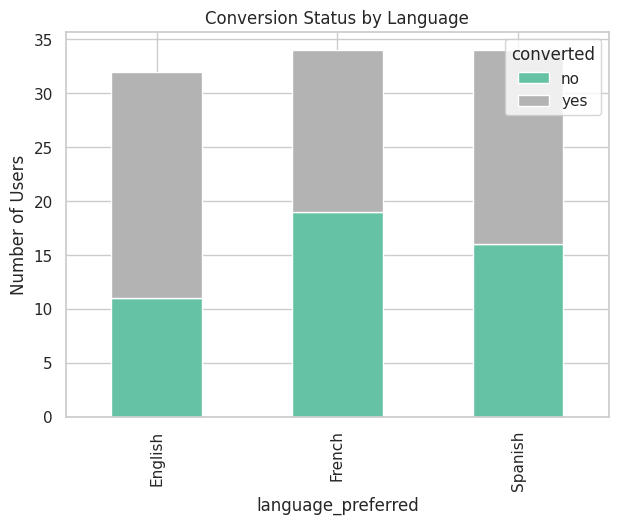


Step 5: Test Statistic and p-value
Chi-square statistic = 3.0930
Degrees of freedom = 2
p-value = 0.212989

Step 6: Decision Rule
α = 0.05
Decision: Fail to reject H0


In [28]:
# --- Step 1: Visual analysis (stacked barplot of conversion by language) ---
crosstab_counts = pd.crosstab(df['language_preferred'], df['converted'])

crosstab_counts.plot(kind="bar", stacked=True, figsize=(7,5), colormap="Set2")
plt.ylabel("Number of Users")
plt.title("Conversion Status by Language")
plt.show()

# --- Step 2: Hypotheses ---
# H0: Conversion status is independent of preferred language.
# H1: Conversion status is dependent on preferred language.

# --- Step 3: Select the appropriate test (and why) ---
# Appropriate test: Chi-Square Test of Independence
# Reasoning:
#   - Both variables (converted, language_preferred) are categorical.
#   - We want to check if there's an association between them.
#   - The chi-square test compares observed frequencies with expected frequencies under independence.

# --- Step 4: Collect and prepare data ---
# Create contingency table (language × converted)
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

# --- Step 5: Calculate the test statistic and p-value ---
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nStep 5: Test Statistic and p-value")
print(f"Chi-square statistic = {chi2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"p-value = {p_value:.6f}")

# --- Step 6: Compare the p-value with α ---
alpha = 0.05
decision = "Reject H0" if p_value <= alpha else "Fail to reject H0"
print("\nStep 6: Decision Rule")
print(f"α = {alpha}")
print(f"Decision: {decision}")

# --- Step 7: Final Inference ---
# The chi-square statistic was about 3.09 with 2 degrees of freedom,
# and the p-value ≈ 0.213, which is GREATER than α = 0.05.
# Therefore, we FAIL to reject the null hypothesis.
# This means there is no statistically significant evidence that conversion status depends on preferred language.

## 4. Is the time spent on the new page same for the different language users?

> Add blockquote



/tmp/ipython-input-2081672107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data=new_page_df, palette="Set2")


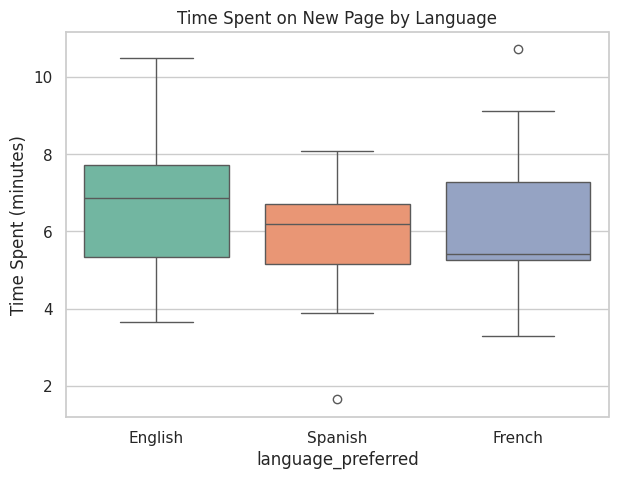


Step 5: Test Statistic and p-value
F-statistic = 0.8544
p-value = 0.432041

Step 6: Decision Rule
α = 0.05
Decision: Fail to reject H0


In [29]:
# --- Step 1: Visual analysis (boxplot of time by language for new page only) ---
new_page_df = df[df['landing_page'].str.lower() == 'new']

plt.figure(figsize=(7,5))
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data=new_page_df, palette="Set2")
plt.ylabel("Time Spent (minutes)")
plt.title("Time Spent on New Page by Language")
plt.show()

# --- Step 2: Hypotheses ---
# H0: Mean time spent is the same across all language groups.
# H1: Mean time spent differs for at least one language group.

# --- Step 3: Select the appropriate test (and why) ---
# Appropriate test: One-Way ANOVA
# Reasoning:
#   - The outcome variable (time_spent_on_the_page) is numeric.
#   - We are comparing means across more than two independent groups (languages).
#   - ANOVA tests if at least one group mean differs significantly.


# --- Step 4: Collect and prepare data ---
# Extract time spent values by language for new page users
groups = [grp["time_spent_on_the_page"].values for _, grp in new_page_df.groupby("language_preferred")]

# --- Step 5: Calculate the test statistic and p-value ---
f_stat, p_value = f_oneway(*groups)

print("\nStep 5: Test Statistic and p-value")
print(f"F-statistic = {f_stat:.4f}")
print(f"p-value = {p_value:.6f}")

# --- Step 6: Compare the p-value with α ---
alpha = 0.05
decision = "Reject H0" if p_value <= alpha else "Fail to reject H0"
print("\nStep 6: Decision Rule")
print(f"α = {alpha}")
print(f"Decision: {decision}")

# --- Step 7: Final Inference ---
# The F-statistic was about 0.85 and the p-value ≈ 0.432, which is GREATER than α = 0.05.
# Therefore, we FAIL to reject the null hypothesis.
# This means there is no statistically significant evidence that the average time spent
# on the NEW landing page differs across language groups.

## Conclusion and Business Recommendations

## Conclusion and Business Recommendations

### Key Findings
1. **Time Spent**  
   - Users spent significantly more time on the **new landing page** than the old page.  
   - Evidence that the new design increases user engagement.

2. **Conversion Rate**  
   - Conversion rate was significantly higher for the **new landing page**.  
   - Strong evidence that the new design leads to more subscriptions.

3. **Conversion vs Language**  
   - No significant relationship between **conversion status** and **preferred language**.  
   - Users convert at similar rates regardless of language preference.

4. **Time Spent vs Language**  
   - No significant difference in **time spent** across language groups for the new page.  
   - Engagement levels are consistent across different language users.

---

### Business Recommendations
- **Adopt the new landing page design**:  
  The new desgn improves both engagement (time spent) and conversion rate, directly supporting business growth.  

- **No urgent need for language-specific changes**:  
  Since conversion and engagement are not significantly different across languages, the current language support is effective.  

- **Leverage consistency across languages**:  
  Since results are stable across language groups, scaling the same design across all supported languages is efficient and cost-effective.

---

**Final Note:**  
The new landing page is statistically proven to be more effective.  
**Recommendation: Roll out the new page to all users to maximize engagement and subscriptions.**


___